In [2]:
from warnings import filterwarnings
filterwarnings('ignore')  # uyarıları almamak için

## Çoklu Doğrusal Regresyon

### Model

In [3]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df = pd.read_csv("./dogRegMod/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
x = df.drop('sales', axis = 1) # bagımsız değişken
y = df[["sales"]]  #bagımlı değişken

In [5]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [6]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [7]:
#Statsmodels ile model kurmak

In [8]:
import statsmodels.api as sm

In [9]:
lm = sm.OLS(y,x)

In [10]:
model = lm.fit()

In [11]:
model.summary()  #çoklu doğrusal regresyonun model çıktısıdır

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):                   2.43e-171
Time:                        03:10:15   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# scikit learn ile model kurmak

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [14]:
model = lm.fit(x,y)

In [15]:
model.intercept_


array([2.93888937])

In [16]:
model.coef_  #kütüphanemiz farklı oldugu için farklı katsayılar çıktı ileri konular

array([[ 0.04576465,  0.18853002, -0.00103749]])

## Tahmin

**Sales = 2.94 + TV * 0.04 + radio * 0.19 - newspaper * 0.001**

30 birim TV, 10 birim radio, 40 birim gazete 

In [17]:
2.94 + 30 * 0.04 + 10 * 0.19 - 40 * 0.001

5.999999999999999

In [18]:
yeni_veri = [[30],[10],[40]]

In [19]:
import pandas as pd
yeni_veri = pd.DataFrame(yeni_veri).T

In [20]:
yeni_veri

,0,1,2
0,30,10,40


In [21]:
model.predict(yeni_veri)

array([[6.15562918]])

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
y.head()  #gerçek değerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [24]:
model.predict(x)[0:10]  # bagımsız değişkenleri kulllanarak tahmin edilen değerler

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [25]:
MSE = mean_squared_error(y,model.predict(x))
MSE

2.784126314510936

In [26]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

## Model Tuning(Model Doğrulama)

In [27]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [28]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [29]:
#sinama seti
from sklearn.model_selection import train_test_split  # train ve test olarak 2 ye ayırdık

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [31]:
x_train.head()

,TV,radio,newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4


In [32]:
x_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [33]:
y_train.head()

,sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5


In [34]:
y_test.head()

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


In [35]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [36]:
#egitim hatasi
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

1.736902590147092

In [37]:
#test hatasi
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

1.4113417558581587

In [38]:
#k-katlı cv

**Not = Elimizde bin kayıtlık bir veri seti olsun. Biz bu veri setinin bir kısmı ile modelimizi eğitmek, bir kısmı ile eğittiğimiz modelimizin başarısını değerlendirmek istiyoruz. Basit yaklaşım; %75’ini eğitim için, %25’ini de test için ayırmaktır. Ancak burada veri parçalanırken verinin dağılımına bağlı olarak modelin eğitim ve testinde bazı sapmalar (bias)  ve hatalar oluşabilir. İşte k-fold cross validation, veriyi belirlenen bir k sayısına göre eşit parçalara böler, her bir parçanın hem eğitim hem de test için kullanılmasını sağlar, böylelikle dağılım ve parçalanmadan kaynaklanan sapma ve hataları asgariye indirir. Ancak modeli k kadar eğitmek ve test etmek gibi ilave bir veri işleme yük ve zamanı ister. Bu durum eğitim ve testi kısa süren küçük ve orta hacimli veriler için sorun olmasa da büyük hacimli veri setlerinde hesaplama ve zaman yönünden maliyetli olabilir.**

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_score(model, x_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

array([-1.62375953, -3.81875608, -3.43828142, -2.27748673, -7.25325414,
       -1.88303708, -2.80517715, -3.68594486, -1.12810834, -3.96330989])

***burada train seti kendi üzerinden 10 parçaya bölündü 9 parça ile önce model kurulup dışarda kalan 1 parça tahmin edildi buradan 1 hata elde edildi ... bu şekilde 10 tane hata elde edildi***

In [41]:
# cv MSE
np.mean(-cross_val_score(model, x_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))# değerler negatif oldugundan başına - işareti koyduk

3.1877115209443567

In [42]:
# cv RMSE
np.sqrt(np.mean(-cross_val_score(model, x_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

1.7854163438661461

In [43]:
# sonuç olarak daha dogru bir hata ölçüsü verir(cv yöntemi (croos validation ) doğrulanmış bir hatadır)

# Ridge Regresyon

### Gerekli Kütüphaneler

In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

### Veri Seti

In [45]:
df = pd.read_csv("./dogRegMod/Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])  #Sıra geldi kategorik değişkenleri numerik değişkenlere dönüştürmeye. Bunun için pandas içindeki “get_dummies()”i kullanacağız.

y = df["Salary"]  #bagımlı deg

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64') #kategorik ve bagımlı değişkenimiz dışındakileri aldık

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)  #bagımsız değişkenleri oluşturduk,Dönüştürülen değişkenler ve X_’yi birleştirerek X’i elde ediyoruz. X, y’yi tahmin etmek için kullanacağımız bağımsız değişkenleri içeriyor. 

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)  #X_train ve y_train modeli geliştirmek için X_test ve y_test ise modeli test etmek için kullanılacak bağımlı ve bağımsız değişkenleri gösteriyor. Test_size verilerin % kaçını test için kullanılacağını (%30) belirtir. Burada herhangi bir değer belirtmezsek defaultta gelen 0.25 değeri kullanılır. Random_state ise programı her çalıştırdığımızda aynı ayrımı görmek için kullanılır.

In [46]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [47]:
dms  #one hot encoding yaptık dms’i incelediğimizde kategorik değişkenlerin 1 ve 0'lar ile numerik değişkenlere dönüştüğünü görüyoruz. Veri setinde her bir değişkenin bir tanesini kullanmamız yeterli olacaktır.

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [48]:
X_ #get_dummies()” içinde numerik değişkenlere dönüşücek kategorik değişkenleri yazıyoruz. Daha sonra veri setinden bu kategorik değişkenleri ve tahmin etmek istediğimiz değişkeni düşürüyoruz ve bunu X_’ye eşitliyoruz.

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0


In [49]:
X  #bağımsız değişkenler

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [50]:
# Not = İlk başta “ridge” adında bir model yaratıyoruz ve modele hiçbir parametre vermeden X_train ve y_train ile eğitiyoruz. Bunun sonucunda aldığımız hata 331.527 oluyor. Daha sonra RidgeCV yi kullanarak bir cross validation işlemi uyguluyoruz. Bu işlem veri setimiz için en uygun parametreleri elde etmemizi sağlıyor. İşlem tamamlandıktan sonra elde ettiğimiz en iyi alpha değeri ile yeni bir model (ridge_tuned) kuruyoruz ve eğitiyoruz. Buradan elde ettiğimiz hata ise 331.299 oluyor.

In [51]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)# burada alpha dediğimiz şey lambda defterine bak!

In [52]:
ridge_model

Ridge(alpha=0.1)

In [53]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [54]:
ridge_model.intercept_

-4.578626905724377

In [55]:
np.linspace(10,-2,100)   # linspace fonk = 10 ile -2 arasında 100 tane array oluşturur

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [56]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [57]:
lambdalar  #bir yontemle oluşturdugumuz lambda adeğerlerine karşı katsayıların nasıl değişecek oldugunu gözlemlicez

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [58]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

In [59]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

In [60]:
#gözlemleyebilmek adına bir grafik oluşturuyoruz

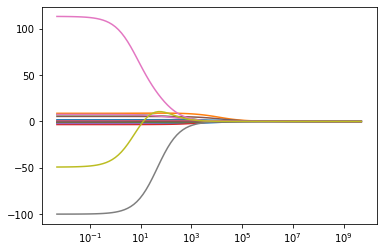

In [61]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")  # farklı lambda değerlerine karşılık olacak şekilde farklı katsayıların nasıl oluştuğunu göstermiş, 0 olmuyor 0 a yaklaşıyor lassoda durm farklı onda 0 olabiliyor

## Tahmin

In [62]:
ridge_model = Ridge().fit(X_train, y_train)

In [63]:
y_pred = ridge_model.predict(X_train)

In [64]:
y_pred[0:10]  # tahmin edilen değerler

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [65]:
y_train[0:10] # gerçek değerler

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [66]:
# train hatası
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

289.34470696006565

In [67]:
# CV RMSE   
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv = 10, scoring= "neg_mean_squared_error")))

351.3931585606395

In [68]:
y_predT = ridge_model.predict(X_test)

In [69]:
RMSE = np.sqrt(mean_squared_error(y_test,y_predT))
RMSE

356.8082905730228

## Model Tuning

**Neden Model Tuning?**    en uygun parametre değerlerini bulabilmek için modellerı tune etmiş oluyorux

In [70]:
ridge_model = Ridge(100).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)  #test setinin bağımlı değişkenlerini tahmin ettik
np.sqrt(mean_squared_error(y_test, y_pred)) #

357.81546682798256

In [71]:
lambdalar1 = np.random.randint(0,1000,100)

In [72]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5 # linspace eşit uzaklıkta boluyor sayıları

In [73]:
ridgecv = RidgeCV(alphas = lambdalar2, scoring ="neg_mean_squared_error",cv = 10,normalize = True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [74]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([126, 760, 528, 942, 676,  57, 910, 362, 431, 698, 411, 678, 756,
       848, 731, 151, 772, 910, 628,  41, 314, 756,   7, 863, 867, 990,
       541, 538, 186, 490, 105, 239, 337, 370, 525, 770, 929, 278, 474,
       296, 742, 383, 749, 846, 271, 206,  74, 404, 688,  67, 536, 659,
        49, 835, 358, 103, 572, 504, 267, 629, 175,  44, 913, 969, 445,
       600, 204,  51, 399, 975, 913, 349, 931, 892, 567, 789, 639, 467,
       799, 364, 911, 196, 944, 416, 912, 559, 905, 530, 584, 782, 758,
       131, 458, 881, 992, 864, 142,  24, 900, 215]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [1]:
ridgecv.alpha_  # optimum parametre değeri , en uygun değeri bulduktan sonra bunun üzerinde bir tahmin etme işlemi yapıyoruz ve hata kareler ortalamasını buluyoruz

NameError: name 'ridgecv' is not defined

In [76]:
#final modeli 

In [2]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)  # en uygun değerle modelimizi kurduk

NameError: name 'Ridge' is not defined

In [3]:
y_pred = ridge_tuned.predict(X_test)  # yeni kurulan model ile tahmin etme işlemini gerçekleştirdik
np.sqrt(mean_squared_error(y_test, y_pred))  # en son hata kareler ortalamasına baktık

NameError: name 'ridge_tuned' is not defined

# Lasso Regresyon

### Gerekli Kütüphaneler

In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

### Veri Seti

In [80]:
df = pd.read_csv("./dogRegMod/Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [81]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [82]:
df.shape

(263, 20)

In [83]:
lasso_model = Lasso().fit(X_train,y_train)

In [84]:
lasso_model

Lasso()

In [85]:
lasso_model.intercept_

-5.587450677336392

In [86]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [87]:
# farklı lambda değerlerine karşılık katsayilar

In [88]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,10000)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

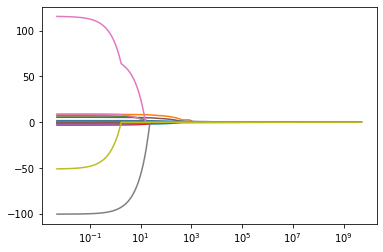

In [89]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")  #0 OLMUŞ ya da sıfıra yaklaşmış ridge 0 olmuoyr sadece 0 a yaklaşıyordu

## Tahmin

In [90]:
lasso_model.predict(X_train)[0:5]  #bağımsız değişkenleri kullanarak bsğımlı değişkenleri tahimn ediyoruz

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [91]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [92]:
y_pred = lasso_model.predict(X_test)

In [93]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.09758845540335

In [94]:
r2_score(y_test,y_pred) #bağımsız değişkenlerce bağımlı ddeğişkenlerdeki değişikliğin aççıklanması yüzdesidir

0.41422798132366156

## Model Tuning

In [95]:
lasso_cv = LassoCV(cv= 10 , max_iter = 100000).fit(X_train,y_train)

In [96]:
lasso_cv.alpha_  # optimum parametre değerimiz

563.4670501833854

In [97]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv.alpha_).fit(X_train,y_train) # lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train) bu şekilde de yazsak olur

In [98]:
y_pred = lasso_tuned.predict(X_test)

In [99]:
np.sqrt(mean_squared_error(y_test,y_pred))

373.5957225069796

In [100]:
pd.Series(lasso_tuned.coef_,index = X_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ElasticNet Regresyon Modeli

### Gerekli Kütüphaneler

In [101]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

### Veri Seti

In [102]:
df = pd.read_csv("./dogRegMod/Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [103]:
enet_model = ElasticNet().fit(X_train, y_train)

In [104]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [105]:
enet_model.intercept_

-6.465955602114036

#### Tahmin

In [106]:
#tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [107]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [108]:
y_pred = enet_model.predict(X_test)

In [109]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181248

In [110]:
r2_score(y_test,y_pred)

0.410702224693268

## Model Tuning

In [111]:
enet_cv = ElasticNetCV(cv = 10).fit(X_train,y_train)

In [112]:
enet_cv.alpha_

5230.7647364798695

In [113]:
enet_cv.intercept_

-38.519405583942785

In [114]:
enet_cv.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [115]:
# final modeli

In [116]:
enet_tuned = ElasticNet(alpha = enet_cv.alpha_).fit(X_train,y_train)

In [117]:
y_pred = enet_tuned.predict(X_test)

In [118]:
np.sqrt(mean_squared_error(y_test,y_pred))

394.15280563218795

In [119]:
?ElasticNet  # l1 ratio oranı 0 olsaydı l2 cezalandırılması 1 oldugunda  L1 cezalandırılması yapılır

Object `ElasticNet  # l1 ratio oranı 0 olsaydı l2 cezalandırılması 1 oldugunda  L1 cezalandırılması yapılır` not found.


,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5
5,19,28321.0
6,19,30075.0
7,20,27222.5
8,20,32222.5
9,24,28594.5


    Aylar  Satislar
0       8   19671.5
1      10   23102.5
2      11   18865.5
3      13   21762.5
4      14   19945.5
5      19   28321.0
6      19   30075.0
7      20   27222.5
8      20   32222.5
9      24   28594.5
10     25   31609.0
11     25   27897.0
12     25   28478.5
13     26   28540.5
14     29   30555.5
15     31   33969.0
16     32   33014.5
17     34   41544.0
18     37   40681.5
19     37    4697.0
20     42   45869.0
21     44   49136.5
22     49   50651.0
23     50   56906.0
24     54   54715.5
25     55   52791.0
26     59   58484.5
27     59   56317.5
28     64   61195.5
29     65   60936.0


InvalidIndexError: (slice(None, None, None), None)

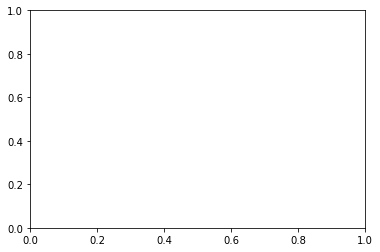

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


satis = pd.read_csv("satislar.txt")
print(satis)

# Linear Regression  y=ax+b  (y bağımlı x bağımsız değişken a eğimi b sağa sola ne kadar kaydıracagımızı veriyor)

aylar = satis[["Aylar"]]
satislar = satis[["Satislar"]]



from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(aylar,satislar,test_size = 0.33,  random_state = 0)

# model inşası(linear regression)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(x_train,y_train)

tahmin = model.predict(x_test)

plt.plot(model,(x_train,y_train)